In [49]:
#importing the libraries
import pandas as pd
import numpy as np

In [50]:
df = pd.read_csv('nlp.tsv',delimiter='\t',quoting=3)
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [51]:
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer

lemma = WordNetLemmatizer()
all_stop = stopwords.words('english')
all_stop.remove('not')

corpus = [] #this list willcontain processed reviews
for i in range(0,1000):
  review = df.iloc[i,0]
  review = re.sub('[^a-zA-Z]',' ',review)
  review = review.lower()
  review = review.split()
  review = [lemma.lemmatize(word) for word in review if not word in all_stop]
  review = ' '.join(review)
  corpus.append(review)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [52]:
print(corpus)

['wow loved place', 'crust not good', 'not tasty texture nasty', 'stopped late may bank holiday rick steve recommendation loved', 'selection menu great price', 'getting angry want damn pho', 'honeslty taste fresh', 'potato like rubber could tell made ahead time kept warmer', 'fry great', 'great touch', 'service prompt', 'would not go back', 'cashier care ever say still ended wayyy overpriced', 'tried cape cod ravoli chicken cranberry mmmm', 'disgusted pretty sure human hair', 'shocked sign indicate cash', 'highly recommended', 'waitress little slow service', 'place not worth time let alone vega', 'not like', 'burrittos blah', 'food amazing', 'service also cute', 'could care le interior beautiful', 'performed', 'right red velvet cake ohhh stuff good', 'never brought salad asked', 'hole wall great mexican street taco friendly staff', 'took hour get food table restaurant food luke warm sever running around like totally overwhelmed', 'worst salmon sashimi', 'also combo like burger fry beer

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector = TfidfVectorizer()
x = vector.fit_transform(corpus).toarray()
y = df.iloc[:,-1].values

In [54]:
from sklearn.model_selection import train_test_split
X_tr,X_te,y_tr,y_te = train_test_split(x,y,test_size=0.02,random_state=0)

In [55]:
#import and train RFC
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10,criterion='entropy', random_state=7)
classifier.fit(X_tr,y_tr)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

In [56]:
#predict output and accuracy and confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred = classifier.predict(X_te)
acc = accuracy_score(y_te,y_pred)
cm = confusion_matrix(y_te,y_pred)
acc

0.9

In [57]:
cm

array([[11,  1],
       [ 1,  7]])

<function matplotlib.pyplot.show>

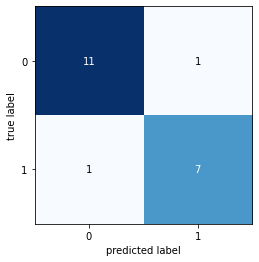

In [58]:
#plotting confusion matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(cm)
plt.show

In [61]:
y_list = []
inp = input('enter input review')
y_list.append(inp)
y_vect = vector.transform(y_list)
y_pr = classifier.predict(y_vect)[0]
if y_pr==0:
  print('bad  review')
else:
  print('good review')

enter input reviewgood food
good review
